In [11]:
!pip install graphviz


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source 
from IPython.display import display
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

import warnings
warnings.filterwarnings("ignore")


In [3]:
df=pd.read_csv("employee_data.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [5]:
cat_vars = ["department", "salary"]
df = pd.get_dummies(df, columns=cat_vars, prefix=cat_vars)

df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False


In [7]:
X=df.drop('quit', axis=1)
y=df.quit

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0, test_size=0.2, stratify=y)


🎯 READY! Use these functions:

# Basic usage:
plot_tree_basic()
plot_tree_basic(crit='entropy', depth=5)

# Compare parameters:
compare_parameters()

# Experiment:
plot_tree_basic('gini', 'random', 8, 3, 2)

🚀 AUTOMATIC TEST:
Decision Tree Training Accuracy: 0.85
Decision Tree Testing Accuracy: 0.85
Decision Tree Training f1 score: 0.83
Decision Tree Testing f1 score: 0.83


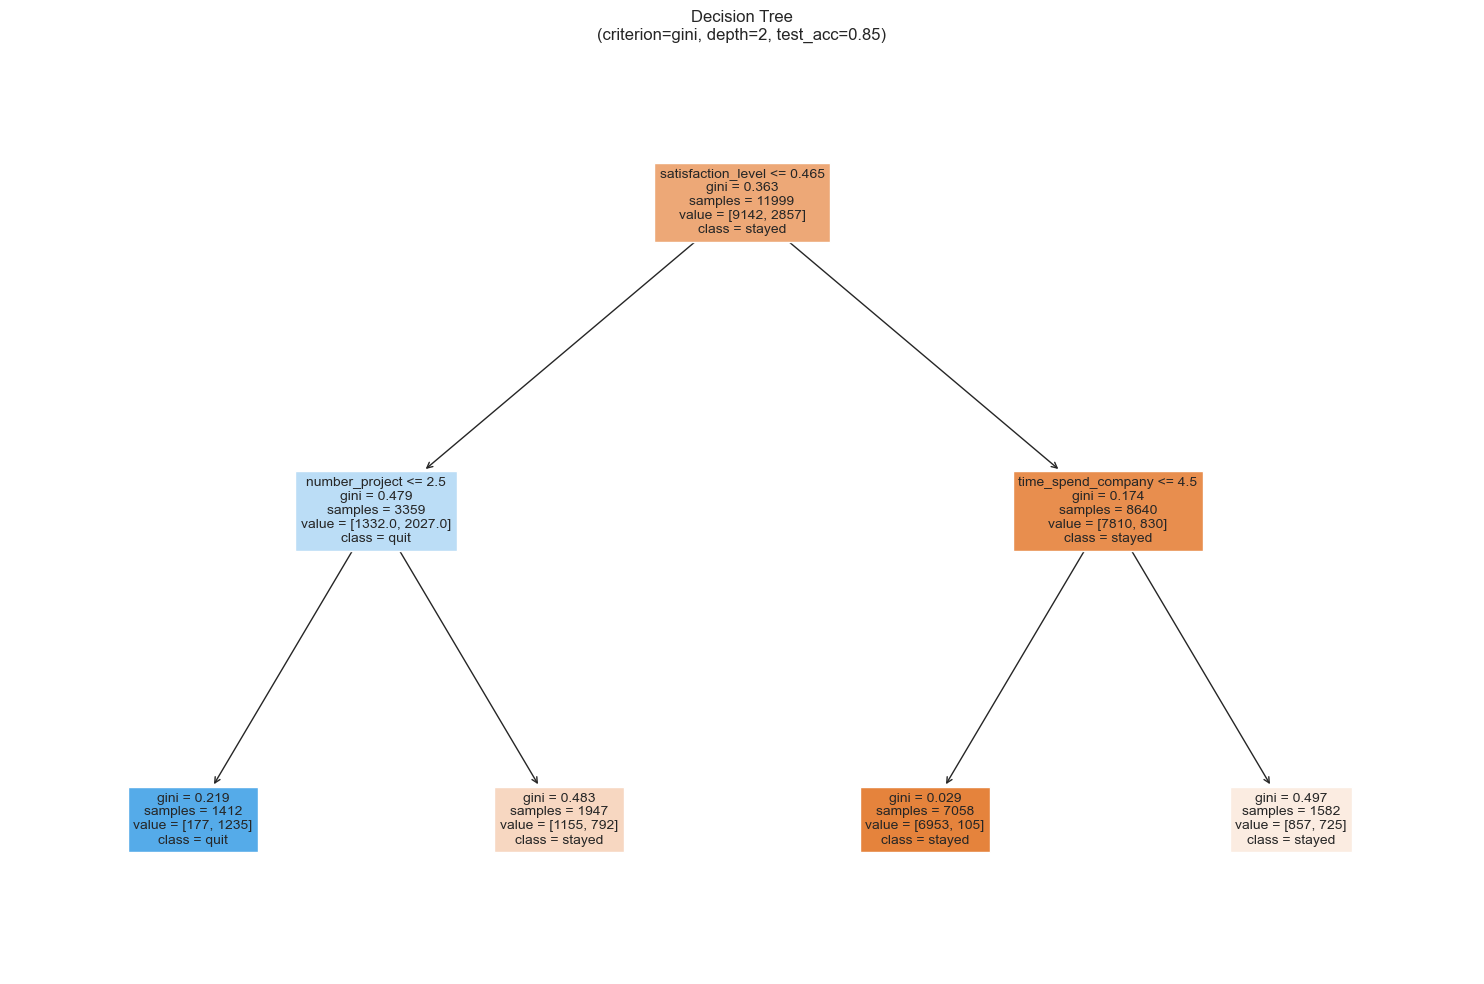

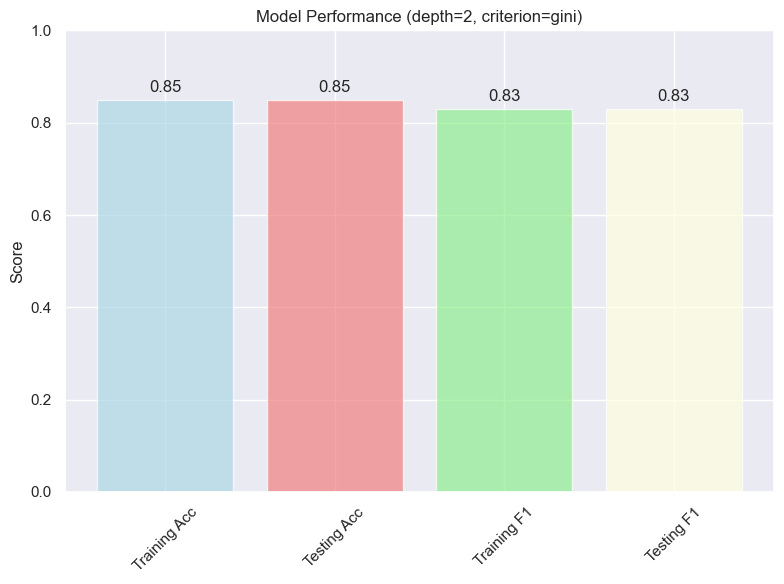

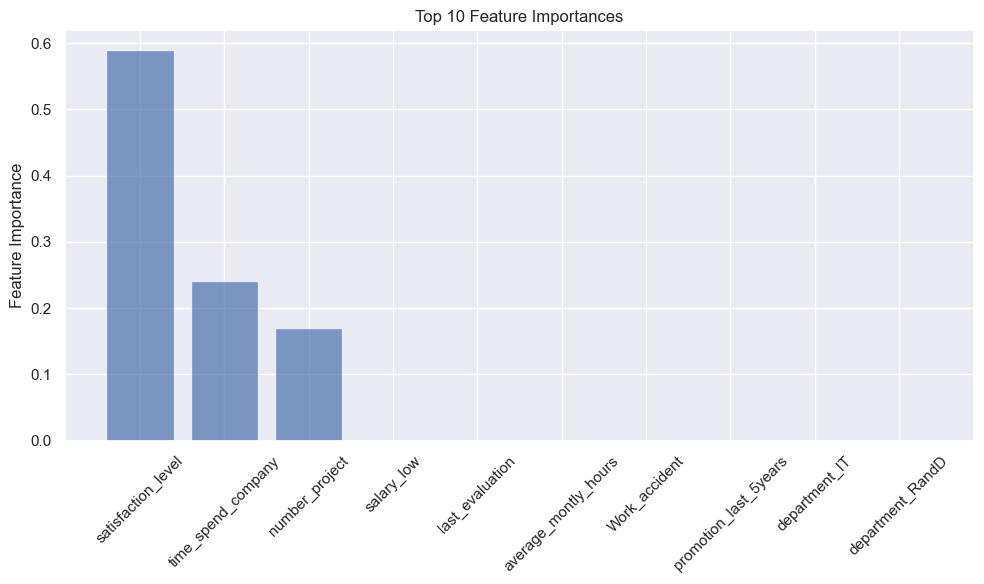

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

def plot_tree_basic(crit='gini', split='best', depth=2, min_split=2, min_leaf=1):
    """
    
    Parameters:
    - crit: 'gini' or 'entropy'
    - split: 'best' or 'random'
    - depth: maximum depth (1-25)
    - min_split: minimum samples for split (2-10)
    - min_leaf: minimum samples in leaf (1-5)
    """
    
    estimator = DecisionTreeClassifier(criterion=crit,
                                     splitter=split,
                                     max_depth=depth,
                                     min_samples_split=min_split,
                                     min_samples_leaf=min_leaf,
                                     random_state=42)

    estimator.fit(X_train, y_train)
    
    # Calculate metrics
    train_acc = round(accuracy_score(y_train, estimator.predict(X_train)), 2)
    test_acc = round(accuracy_score(y_test, estimator.predict(X_test)), 2)
    train_f1 = round(f1_score(y_train, estimator.predict(X_train), average='weighted'), 2)
    test_f1 = round(f1_score(y_test, estimator.predict(X_test), average='weighted'), 2)
    
    print('Decision Tree Training Accuracy:', train_acc)
    print('Decision Tree Testing Accuracy:', test_acc)
    print('Decision Tree Training f1 score:', train_f1)
    print('Decision Tree Testing f1 score:', test_f1)

    if train_acc > 0.99:
        print('Decision Tree Training Accuracy', train_acc, 'Decision Tree Testing Accuracy', test_acc)
        print('Criterion:', crit, '\n', 'Split:', split, '\n', 'Depth:', depth, '\n', 'Min_split:', min_split, '\n', 'Min_leaf:', min_leaf)

    # VISUALIZATION 1: Decision Tree diagram
    plt.figure(figsize=(15, 10))
    tree.plot_tree(estimator, 
                   feature_names=X_train.columns,
                   class_names=['stayed', 'quit'],
                   filled=True,
                   fontsize=10,
                   max_depth=3)  # limit for readability
    plt.title(f'Decision Tree\n(criterion={crit}, depth={depth}, test_acc={test_acc})')
    plt.tight_layout()
    plt.show()
    
    # VISUALIZATION 2: Performance comparison
    plt.figure(figsize=(8, 6))
    metrics = ['Training Acc', 'Testing Acc', 'Training F1', 'Testing F1']
    values = [train_acc, test_acc, train_f1, test_f1]
    colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightyellow']
    
    bars = plt.bar(metrics, values, color=colors, alpha=0.7)
    plt.ylim(0, 1.0)
    plt.ylabel('Score')
    plt.title(f'Model Performance (depth={depth}, criterion={crit})')
    
    # Add values on bars
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{value:.2f}', ha='center', va='bottom')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # VISUALIZATION 3: Feature importance
    if hasattr(estimator, 'feature_importances_'):
        importances = estimator.feature_importances_
        feature_names = X_train.columns
        
        # Sort by importance
        indices = np.argsort(importances)[::-1][:10]  # top 10
        
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(indices)), importances[indices], alpha=0.7)
        plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=45)
        plt.ylabel('Feature Importance')
        plt.title('Top 10 Feature Importances')
        plt.tight_layout()
        plt.show()
    
    return estimator

# FUNCTION TO COMPARE DIFFERENT PARAMETERS
def compare_parameters():
    """
    Compare different parameter combinations
    """
    configs = [
        {'crit': 'gini', 'depth': 2, 'name': 'Shallow Gini'},
        {'crit': 'entropy', 'depth': 2, 'name': 'Shallow Entropy'},
        {'crit': 'gini', 'depth': 10, 'name': 'Deep Gini'},
        {'crit': 'entropy', 'depth': 10, 'name': 'Deep Entropy'}
    ]
    
    results = []
    
    for config in configs:
        estimator = DecisionTreeClassifier(
            criterion=config['crit'],
            max_depth=config['depth'],
            random_state=42
        )
        estimator.fit(X_train, y_train)
        
        train_acc = accuracy_score(y_train, estimator.predict(X_train))
        test_acc = accuracy_score(y_test, estimator.predict(X_test))
        
        results.append({
            'name': config['name'],
            'train_acc': train_acc,
            'test_acc': test_acc,
            'overfitting': train_acc - test_acc
        })
    
    # Visualization of comparison
    names = [r['name'] for r in results]
    train_accs = [r['train_acc'] for r in results]
    test_accs = [r['test_acc'] for r in results]
    
    x = np.arange(len(names))
    width = 0.35
    
    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, train_accs, width, label='Training Accuracy', alpha=0.7)
    plt.bar(x + width/2, test_accs, width, label='Testing Accuracy', alpha=0.7)
    
    plt.xlabel('Model Configuration')
    plt.ylabel('Accuracy')
    plt.title('Comparison of Different Decision Tree Configurations')
    plt.xticks(x, names)
    plt.legend()
    plt.ylim(0, 1.0)
    
    # Add values
    for i, (train, test) in enumerate(zip(train_accs, test_accs)):
        plt.text(i - width/2, train + 0.01, f'{train:.3f}', ha='center', va='bottom', fontsize=9)
        plt.text(i + width/2, test + 0.01, f'{test:.3f}', ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Display table
    print("\n📊 DETAILED COMPARISON:")
    print("-" * 60)
    for result in results:
        print(f"{result['name']:15} | Train: {result['train_acc']:.3f} | Test: {result['test_acc']:.3f} | Diff: {result['overfitting']:.3f}")

# USAGE EXAMPLES
print("READY! Use these functions:")
print()
print("# Basic usage:")
print("plot_tree_basic()")
print("plot_tree_basic(crit='entropy', depth=5)")
print()
print("# Compare parameters:")
print("compare_parameters()")
print()
print("# Experiment:")
print("plot_tree_basic('gini', 'random', 8, 3, 2)")

# Automatic test
print("\n" + "="*50)
print("🚀 AUTOMATIC TEST:")
print("="*50)
model = plot_tree_basic()

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

def random_forest_basic(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', bootstrap=True):
    """
    Random Forest Classifier with performance metrics
    
    Parameters:
    - n_estimators: number of trees in the forest (10-1000)
    - criterion: 'gini' or 'entropy'
    - max_depth: maximum depth of trees (None for unlimited)
    - min_samples_split: minimum samples for split (2-10)
    - min_samples_leaf: minimum samples in leaf (1-5)
    - max_features: features to consider for best split ('sqrt', 'log2', None, or int)
    - bootstrap: whether to use bootstrap sampling (True/False)
    """
    
    # Create Random Forest model
    rf_estimator = RandomForestClassifier(
        n_estimators=n_estimators,
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        oob_score=bootstrap,  # Enable OOB score only when bootstrap=True
        random_state=42,
        n_jobs=-1  # Use all available cores
    )
    
    # Train the model
    rf_estimator.fit(X_train, y_train)
    
    # Calculate metrics
    train_acc = round(accuracy_score(y_train, rf_estimator.predict(X_train)), 2)
    test_acc = round(accuracy_score(y_test, rf_estimator.predict(X_test)), 2)
    train_f1 = round(f1_score(y_train, rf_estimator.predict(X_train), average='weighted'), 2)
    test_f1 = round(f1_score(y_test, rf_estimator.predict(X_test), average='weighted'), 2)
    
    # Display results
    print('Random Forest Training Accuracy:', train_acc)
    print('Random Forest Testing Accuracy:', test_acc)
    print('Random Forest Training f1 score:', train_f1)
    print('Random Forest Testing f1 score:', test_f1)
    
    # Check for overfitting
    if train_acc > 0.99:
        print('Random Forest Training Accuracy', train_acc, 'Random Forest Testing Accuracy', test_acc)
        print('N_estimators:', n_estimators, '\n', 'Criterion:', criterion, '\n', 'Max_depth:', max_depth)
        print('Min_samples_split:', min_samples_split, '\n', 'Min_samples_leaf:', min_samples_leaf, '\n', 'Max_features:', max_features)
    
    # Additional Random Forest specific metrics
    print(f'Number of trees: {rf_estimator.n_estimators}')
    if bootstrap and hasattr(rf_estimator, 'oob_score_'):
        print(f'Out-of-bag score: {rf_estimator.oob_score_:.3f}')
    else:
        print('OOB score not available (bootstrap=False or not computed)')
    
    # Feature importance (top 10)
    if hasattr(rf_estimator, 'feature_importances_'):
        importances = rf_estimator.feature_importances_
        feature_names = X_train.columns
        
        # Get top 10 features
        indices = np.argsort(importances)[::-1][:10]
        
        print('\nTop 10 Feature Importances:')
        print('-' * 40)
        for i, idx in enumerate(indices):
            print(f'{i+1:2d}. {feature_names[idx]:20s} {importances[idx]:.4f}')
    
    return rf_estimator

# FUNCTION TO COMPARE DIFFERENT RANDOM FOREST PARAMETERS
def compare_rf_parameters():
    """
    Compare different Random Forest parameter combinations
    """
    configs = [
        {'n_est': 50, 'depth': 5, 'name': 'Small Forest (50 trees, depth=5)'},
        {'n_est': 100, 'depth': 10, 'name': 'Medium Forest (100 trees, depth=10)'},
        {'n_est': 200, 'depth': None, 'name': 'Large Forest (200 trees, unlimited depth)'},
        {'n_est': 100, 'depth': 3, 'name': 'Shallow Forest (100 trees, depth=3)'}
    ]
    
    results = []
    
    print("Comparing Random Forest configurations...")
    print("=" * 60)
    
    for config in configs:
        rf_estimator = RandomForestClassifier(
            n_estimators=config['n_est'],
            max_depth=config['depth'],
            oob_score=True,  # Enable OOB score
            random_state=42,
            n_jobs=-1
        )
        rf_estimator.fit(X_train, y_train)
        
        train_acc = accuracy_score(y_train, rf_estimator.predict(X_train))
        test_acc = accuracy_score(y_test, rf_estimator.predict(X_test))
        
        results.append({
            'name': config['name'],
            'train_acc': train_acc,
            'test_acc': test_acc,
            'overfitting': train_acc - test_acc,
            'n_estimators': config['n_est'],
            'max_depth': config['depth']
        })
        
        print(f"\n{config['name']}:")
        print(f"  Training Accuracy: {train_acc:.3f}")
        print(f"  Testing Accuracy:  {test_acc:.3f}")
        print(f"  Overfitting Gap:   {train_acc - test_acc:.3f}")
    
    # Summary table
    print("\n" + "=" * 80)
    print("📊 DETAILED COMPARISON:")
    print("=" * 80)
    print(f"{'Configuration':<35} | {'Train':<7} | {'Test':<7} | {'Gap':<7} | {'Trees':<6} | {'Depth'}")
    print("-" * 80)
    for result in results:
        depth_str = str(result['max_depth']) if result['max_depth'] else 'None'
        print(f"{result['name']:<35} | {result['train_acc']:<7.3f} | {result['test_acc']:<7.3f} | {result['overfitting']:<7.3f} | {result['n_estimators']:<6} | {depth_str}")
    
    return results

# FUNCTION TO COMPARE DECISION TREE VS RANDOM FOREST
def compare_dt_vs_rf():
    """
    Compare Decision Tree vs Random Forest performance
    """
    print("Comparing Decision Tree vs Random Forest...")
    print("=" * 50)
    
    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    dt = DecisionTreeClassifier(max_depth=10, random_state=42)
    dt.fit(X_train, y_train)
    
    dt_train_acc = accuracy_score(y_train, dt.predict(X_train))
    dt_test_acc = accuracy_score(y_test, dt.predict(X_test))
    
    # Random Forest
    rf = RandomForestClassifier(n_estimators=100, max_depth=10, oob_score=True, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    rf_train_acc = accuracy_score(y_train, rf.predict(X_train))
    rf_test_acc = accuracy_score(y_test, rf.predict(X_test))
    
    print(f"\nDecision Tree (depth=10):")
    print(f"  Training Accuracy: {dt_train_acc:.3f}")
    print(f"  Testing Accuracy:  {dt_test_acc:.3f}")
    print(f"  Overfitting Gap:   {dt_train_acc - dt_test_acc:.3f}")
    
    print(f"\nRandom Forest (100 trees, depth=10):")
    print(f"  Training Accuracy: {rf_train_acc:.3f}")
    print(f"  Testing Accuracy:  {rf_test_acc:.3f}")
    print(f"  Overfitting Gap:   {rf_train_acc - rf_test_acc:.3f}")
    
    print(f"\nImprovement with Random Forest:")
    print(f"  Training: {rf_train_acc - dt_train_acc:+.3f}")
    print(f"  Testing:  {rf_test_acc - dt_test_acc:+.3f}")
    print(f"  Reduced Overfitting: {(dt_train_acc - dt_test_acc) - (rf_train_acc - rf_test_acc):+.3f}")

# USAGE EXAMPLES
print("READY! Use these Random Forest functions:")
print()
print("# Basic usage:")
print("random_forest_basic()")
print("random_forest_basic(n_estimators=200, max_depth=10)")
print()
print("# Compare RF parameters:")
print("compare_rf_parameters()")
print()
print("# Compare DT vs RF:")
print("compare_dt_vs_rf()")
print()
print("# Advanced usage:")
print("random_forest_basic(n_estimators=500, criterion='entropy', max_depth=15, max_features='log2')")

# Automatic test
print("\n" + "="*50)
print("🚀 AUTOMATIC TEST:")
print("="*50)
rf_model = random_forest_basic()

READY! Use these Random Forest functions:

# Basic usage:
random_forest_basic()
random_forest_basic(n_estimators=200, max_depth=10)

# Compare RF parameters:
compare_rf_parameters()

# Compare DT vs RF:
compare_dt_vs_rf()

# Advanced usage:
random_forest_basic(n_estimators=500, criterion='entropy', max_depth=15, max_features='log2')

🚀 AUTOMATIC TEST:
Random Forest Training Accuracy: 1.0
Random Forest Testing Accuracy: 0.99
Random Forest Training f1 score: 1.0
Random Forest Testing f1 score: 0.99
Random Forest Training Accuracy 1.0 Random Forest Testing Accuracy 0.99
N_estimators: 100 
 Criterion: gini 
 Max_depth: None
Min_samples_split: 2 
 Min_samples_leaf: 1 
 Max_features: sqrt
Number of trees: 100
Out-of-bag score: 0.990

Top 10 Feature Importances:
----------------------------------------
 1. satisfaction_level   0.3132
 2. time_spend_company   0.1816
 3. number_project       0.1746
 4. average_montly_hours 0.1567
 5. last_evaluation      0.1245
 6. Work_accident        0.0118
 

In [41]:
from sklearn.model_selection import RandomizedSearchCV

param_grid ={ 'n_estimators': [10,15,20,50,100,200], 'criterion': ["gini","entropy"],"max_depth": [2,4,6,8,10,20]
            }
rf= RandomForestClassifier()

rs_search_cv = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,cv=3,scoring='f1',n_iter=10,n_jobs=-1)
rs_search_cv.fit(X_train,y_train)

print(rs_search_cv.best_params_)
print(rs_search_cv.best_score_)

{'n_estimators': 10, 'max_depth': 20, 'criterion': 'gini'}
0.9685367184912422
